- 통계분석방법 10주차 실습
- 작성자 : 컴퓨터공학과 12201830 김건탁


In [2]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# File Upload
file_uploaded = files.upload()

Saving data.csv to data.csv
Saving quakes.csv to quakes.csv


In [4]:
df_car = pd.read_csv("data.csv")
df_car.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.4,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.4,7.0,160,5500,16,22,?


In [5]:
plt.rcParams['figure.figsize'] = (7, 6)
plt.rcParams['figure.dpi'] = 150

<ipython-input-6-60398d218b39>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df_car.corr(method='pearson')


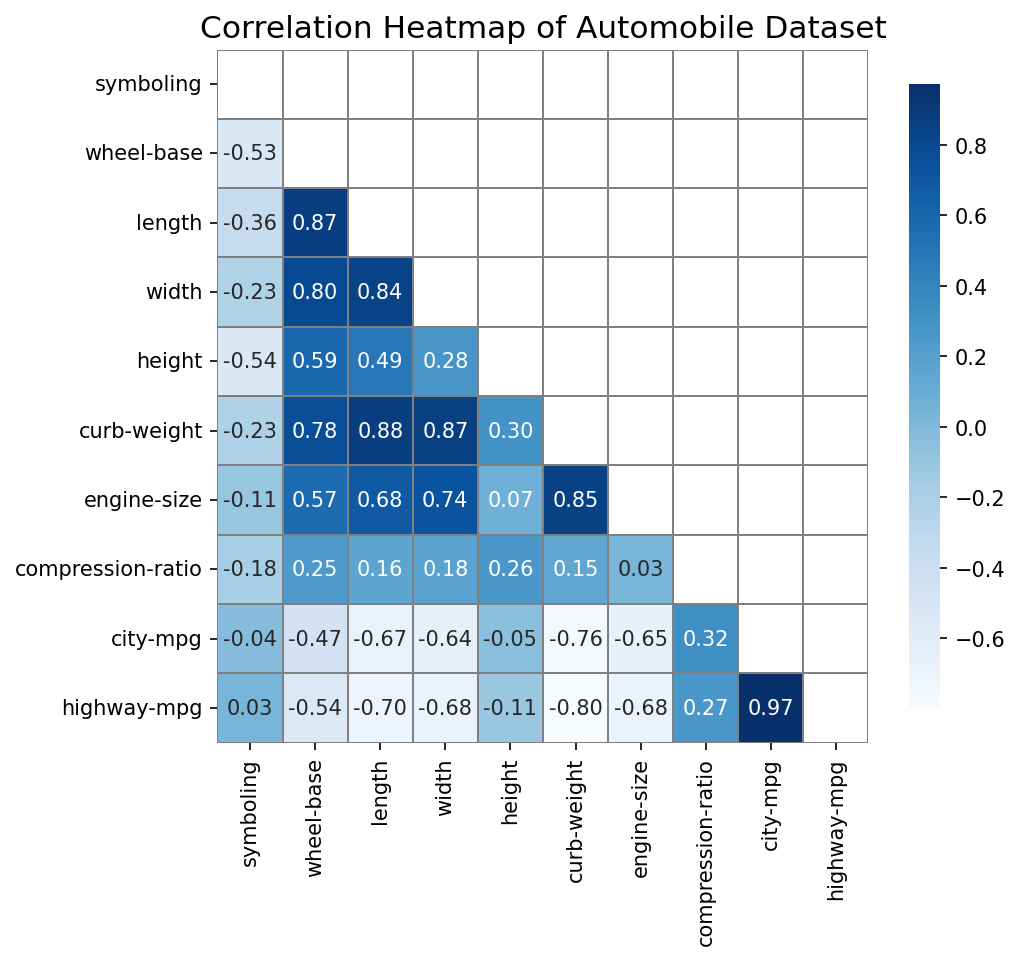

In [6]:
correlation = df_car.corr(method='pearson')

matrix = np.triu(correlation)
sns.heatmap(correlation,xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True, cmap='Blues', fmt='.2f', cbar_kws={"shrink": 0.9}, linewidths=0.1, linecolor='gray', mask=matrix)

plt.title('Correlation Heatmap of Automobile Dataset', fontsize = 15)
sns.set(font_scale=0.7)

<ipython-input-7-04224bf64235>:5: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  df_1 = flights.pivot('month', 'year', 'passengers')


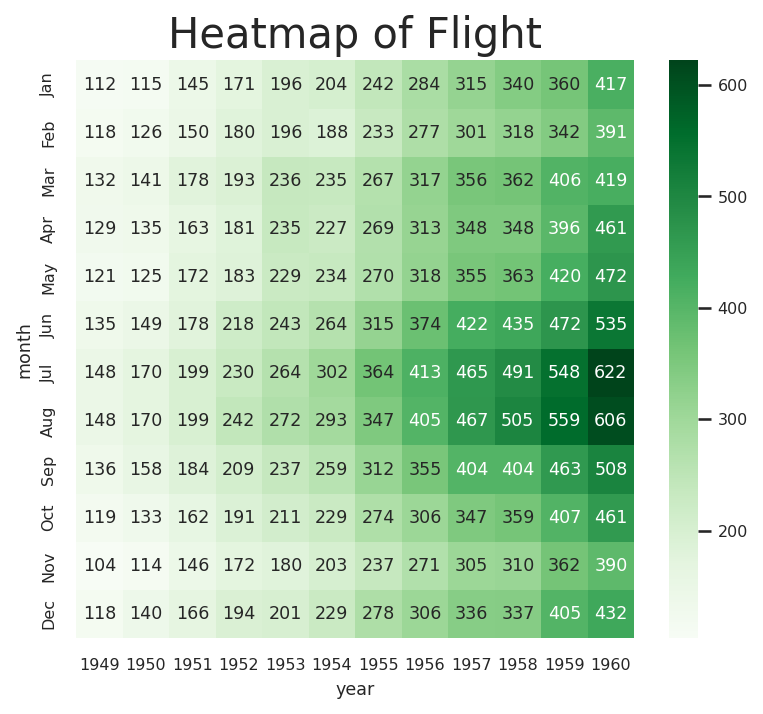

In [7]:
# 2
flights = sns.load_dataset('flights')
fig, ax = plt.subplots(figsize=(6, 5))

df_1 = flights.pivot('month', 'year', 'passengers')
df_1.head(10)
sns.heatmap(df_1, annot=True, ax=ax, cmap='Greens', fmt='g')
plt.title('Heatmap of Flight', fontsize=20)
plt.show() 

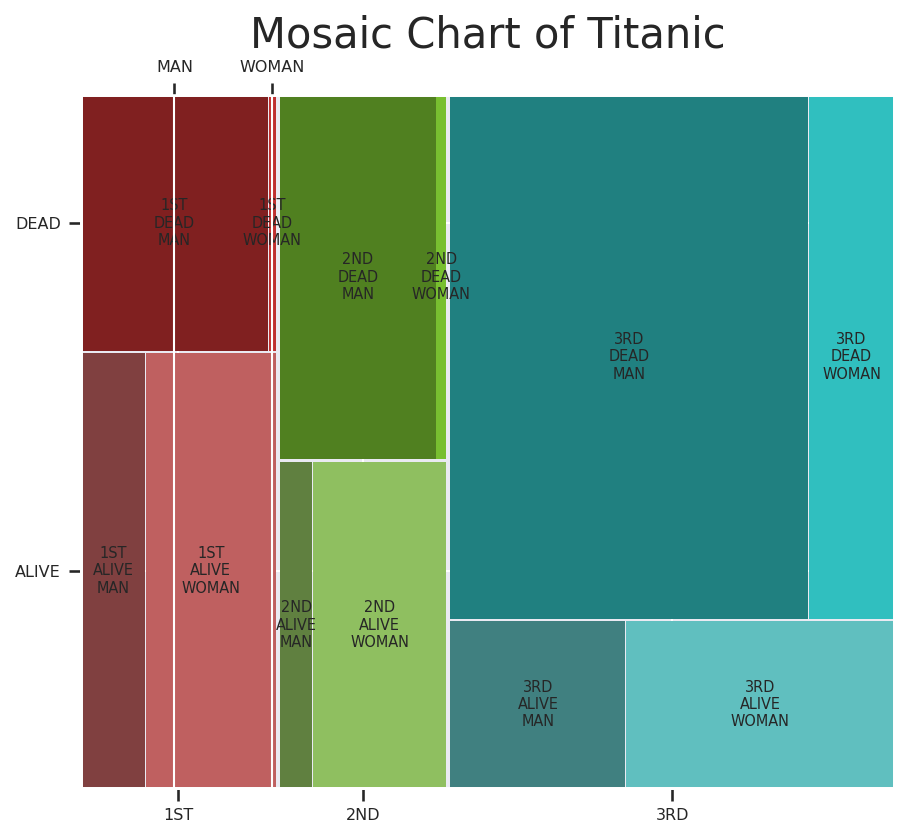

In [8]:
# 3
from statsmodels.graphics.mosaicplot import mosaic
plt.rcParams['figure.figsize'] = [7, 6]
# Getting Titanic dataset
url = "https://raw.github.com/mattdelhey/kaggle-titanic/master/Data/train.csv"
titanic = pd.read_csv(url)
titanic = titanic[['survived', 'pclass', 'sex']]
# make new variables of 'survived' and 'pclass' with the different class name
titanic["SURVIVE"] = titanic.survived.map({0: "DEAD", 1: "ALIVE"})
titanic["CLASS"] = titanic.pclass.map({1: "1ST", 2: "2ND", 3: "3RD"})
titanic["GENDER"] = titanic.sex.map({'male': 'MAN', 'female': "WOMAN"})
# titanic.head()

mosaic(titanic.sort_values('CLASS'), ['CLASS', 'SURVIVE', 'GENDER'])
plt.title('Mosaic Chart of Titanic', fontsize=20)
plt.show()

In [10]:
# 4
df_quakes = pd.read_csv("quakes.csv")
df_quakes.head(10)

,Unnamed: 0,lat,long,depth,mag,stations
0,1,-20.42,181.62,562,4.8,41
1,2,-20.62,181.03,650,4.2,15
2,3,-26.00,184.10,42,5.4,43
3,4,-17.97,181.66,626,4.1,19
4,5,-20.42,181.96,649,4.0,11
5,6,-19.68,184.31,195,4.0,12
6,7,-11.70,166.10,82,4.8,43
7,8,-28.11,181.93,194,4.4,15
8,9,-28.74,181.74,211,4.7,35
9,10,-17.47,179.59,622,4.3,19


Text(0, 0.5, 'Latitude')

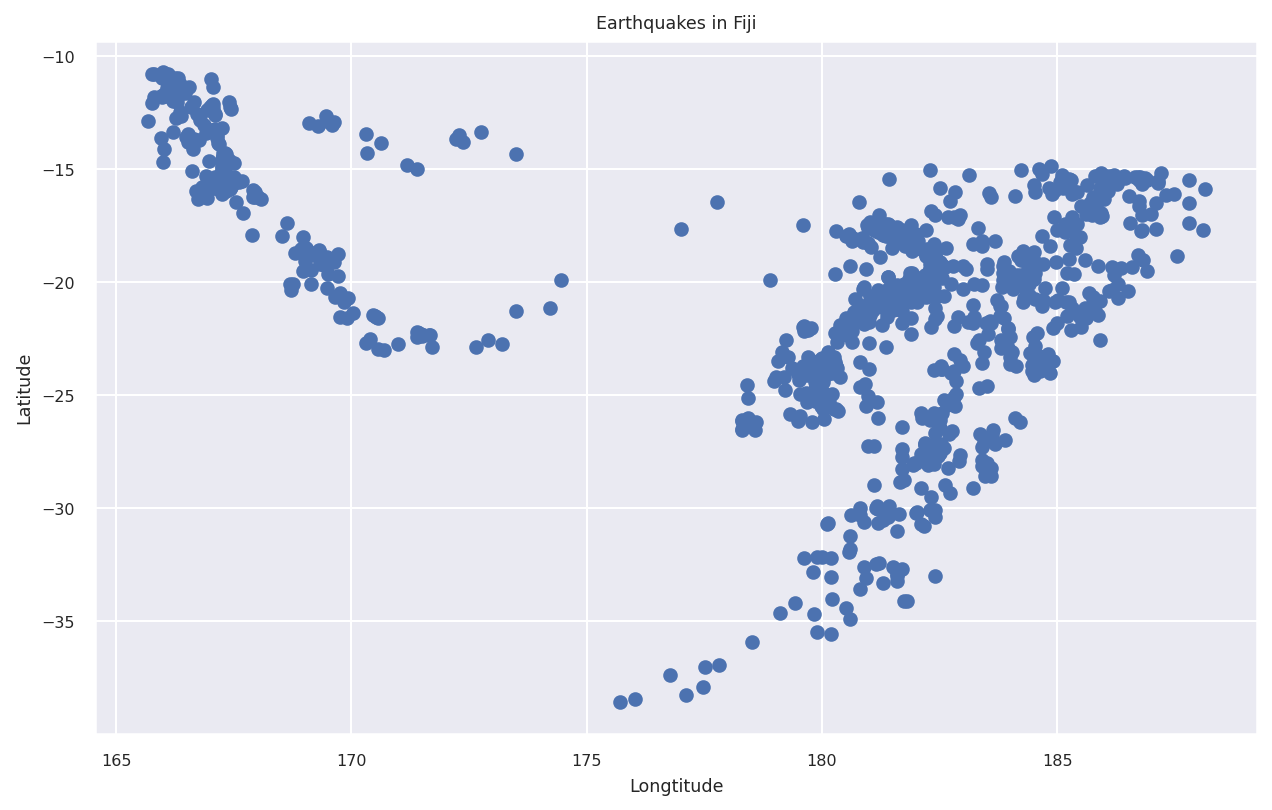

In [11]:
plt.rcParams['figure.figsize'] = [10, 6]

plt.scatter(df_quakes["long"], df_quakes["lat"])
plt.title("Earthquakes in Fiji")
plt.xlabel("Longtitude")
plt.ylabel("Latitude")

<Axes: xlabel='long', ylabel='lat'>

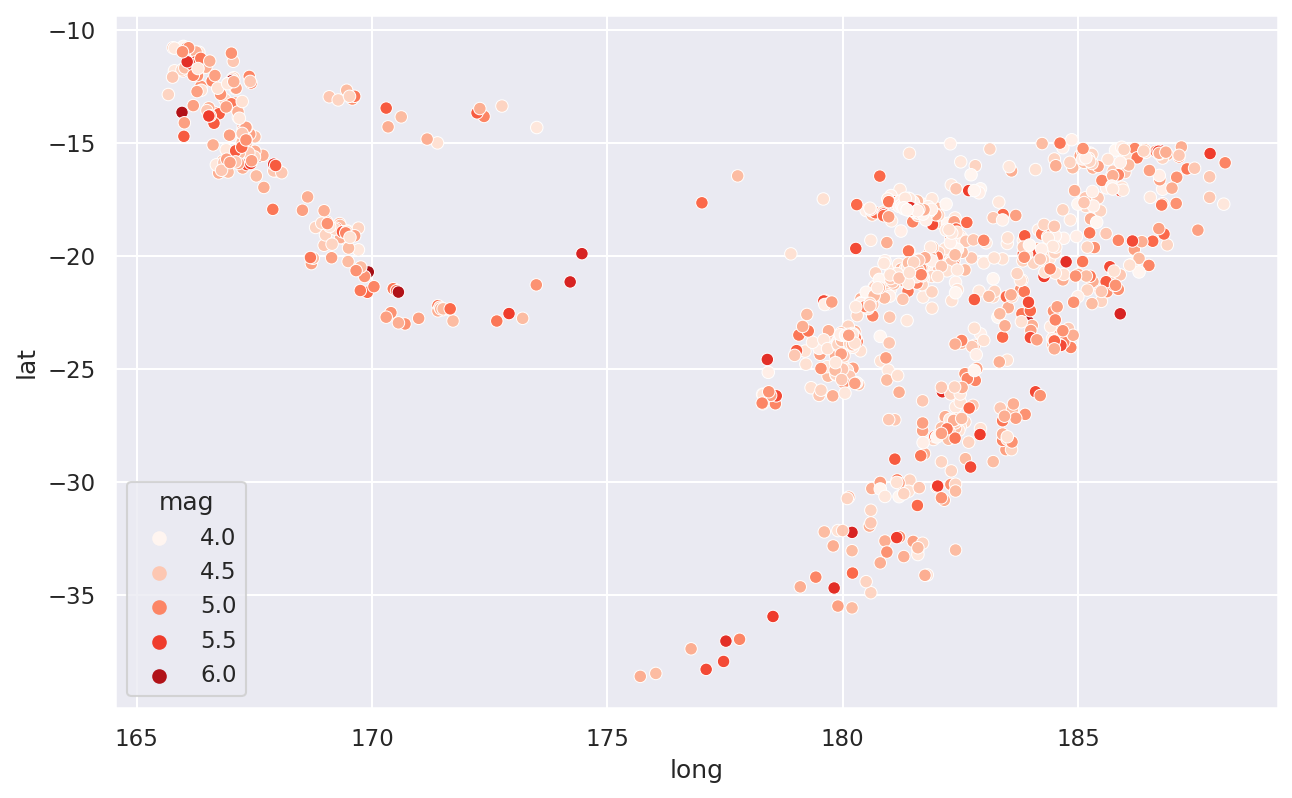

In [13]:
sns.set()
sns.scatterplot(data=df_quakes, x="long", y="lat", hue="mag", palette="Reds")

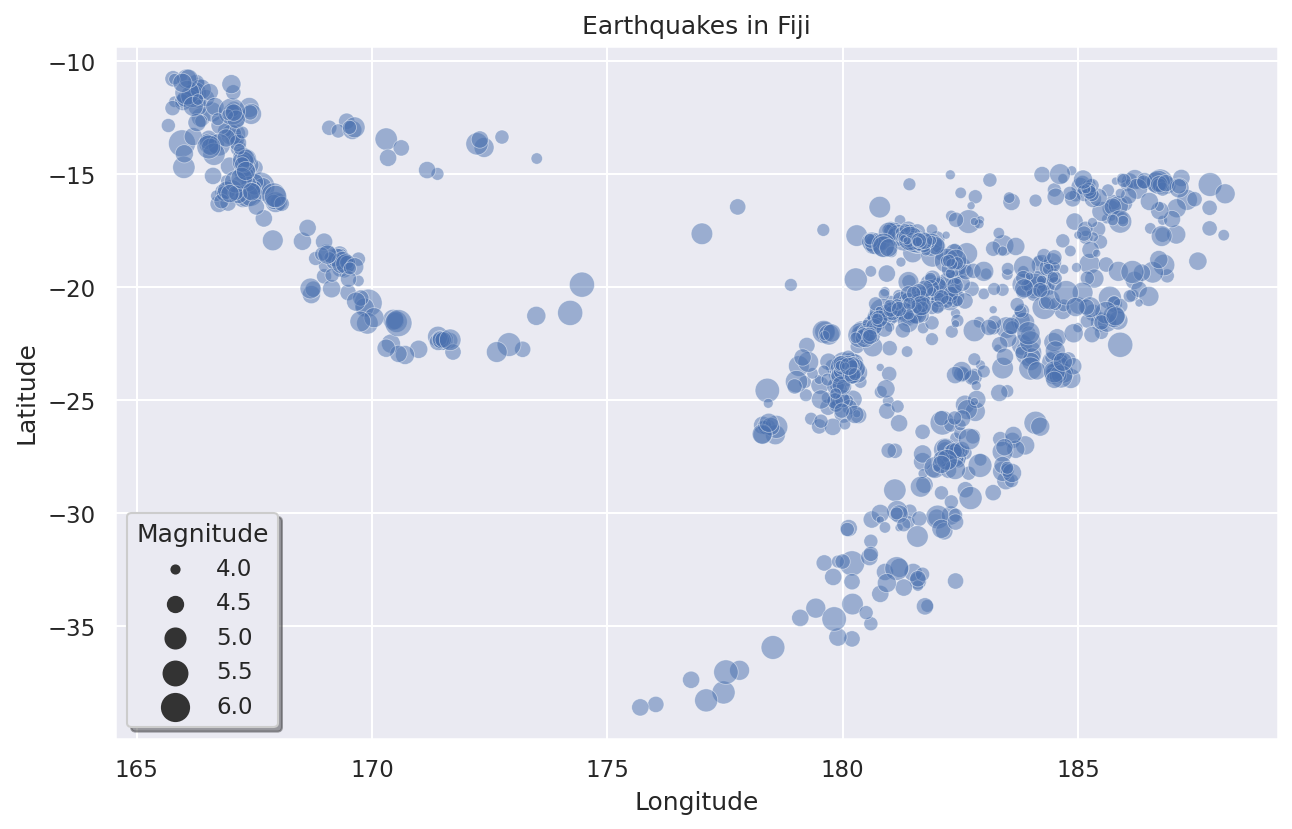

In [15]:
eq = plt.subplots()
eq = sns.scatterplot(data=df_quakes, x="long", y="lat", size="mag", sizes=(15,200), alpha=.5)
eq.set_title("Earthquakes in Fiji")
eq.set_xlabel("Longitude")
eq.set_ylabel("Latitude")
eq.legend(title="Magnitude", shadow = True)
plt.show()

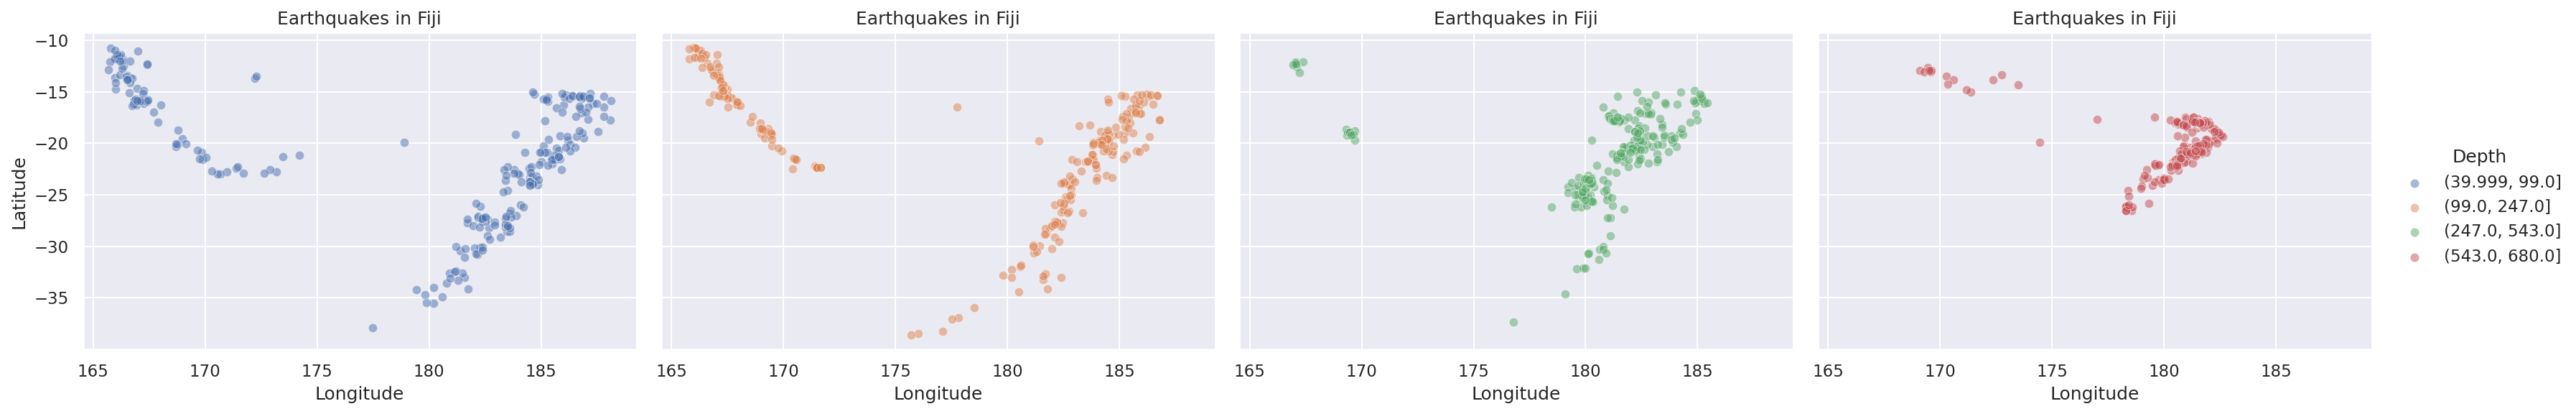

In [16]:
df_quakes['depth_cut'] = pd.qcut(df_quakes['depth'], 4)

grid = sns.FacetGrid(data=df_quakes, col = "depth_cut", hue = "depth_cut", height=4, aspect=1.4)
grid = grid.map(sns.scatterplot, "long", "lat", alpha=.5)
grid = grid.add_legend(title='Depth')

grid.set_titles('Earthquakes in Fiji')
grid.set_axis_labels('Longitude','Latitude')

plt.show()